In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import json
import folium
import networkx as nx

# 1. load data
The data file introduction is below:
1. **u.data**:   The full u data set, `100000 ratings` by `943 users` on `1682 items`. Each user has rated at least 20 movies.  Users and items are numbered consecutively from 1.  The data is randomly ordered. The time stamps are unix seconds since 1/1/1970 UTC.   

2. **u.item**: Information about the items (movies); The last `19 fields` are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not; movies can be in several genres at once. 

3. **u.genre**: A list of the genres.

4. **u.user**: Demographic information about the users

5. **u.occupation**: A list of the occupations.

# 2. data analysis

## 2.1 Movie data

In [5]:
############################### Information about the items (movies) ###############################
column_names = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", \
              "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
              "Sci-Fi", "Thriller", "War", "Western"]
movies_data = pd.read_csv('ml-100k/u.item',sep='|', names=column_names,encoding = "ISO-8859-1")
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.rename(columns = {'movie_id':'item_id'}, inplace = True) 
movies_data

item_id                                movie_title release_date  \
0           1                           Toy Story (1995)   1995-01-01   
1           2                           GoldenEye (1995)   1995-01-01   
2           3                          Four Rooms (1995)   1995-01-01   
3           4                          Get Shorty (1995)   1995-01-01   
4           5                             Copycat (1995)   1995-01-01   
...       ...                                        ...          ...   
1677     1678                          Mat' i syn (1997)   1998-02-06   
1678     1679                           B. Monkey (1998)   1998-02-06   
1679     1680                       Sliding Doors (1998)   1998-01-01   
1680     1681                        You So Crazy (1994)   1994-01-01   
1681     1682  Scream of Stone (Schrei aus Stein) (1991)   1996-03-08   

      video_release_date                                           IMDb_URL  \
0                    NaN  http://us.imdb.com/M/title-exact?Toy%20Story%2...   
1                    NaN  http://us.imdb.com/M/title-exact?GoldenEye%20(...   
2                    NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%...   
3                    NaN  http://us.imdb.com/M/title-exact?Get%20Shorty%...   
4                    NaN  http://us.imdb.com/M/title-exact?Copycat%20(1995)   
...                  ...                                                ...   
1677                 NaN  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...   
1678                 NaN  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...   
1679                 NaN      http://us.imdb.com/Title?Sliding+Doors+(1998)   
1680                 NaN  http://us.imdb.com/M/title-exact?You%20So%20Cr...   
1681                 NaN  http://us.imdb.com/M/title-exact?Schrei%20aus%...   

      unknown  Action  Adventure  Animation  Childrens  ...  Fantasy  \
0           0       0          0          1          1  ...        0   
1           0       1          1          0          0  ...        0   
2           0       0          0          0          0  ...        0   
3           0       1          0          0          0  ...        0   
4           0       0          0          0          0  ...        0   
...       ...     ...        ...        ...        ...  ...      ...   
1677        0       0          0          0          0  ...        0   
1678        0       0          0          0          0  ...        0   
1679        0       0          0          0          0  ...        0   
1680        0       0          0          0          0  ...        0   
1681        0       0          0          0          0  ...        0   

      Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0             0       0        0        0        0       0         0    0   
1             0       0        0        0        0       0         1    0   
2             0       0        0        0        0       0         1    0   
3             0       0        0        0        0       0         0    0   
4             0       0        0        0        0       0         1    0   
...         ...     ...      ...      ...      ...     ...       ...  ...   
1677          0       0        0        0        0       0         0    0   
1678          0       0        0        0        1       0         1    0   
1679          0       0        0        0        1       0         0    0   
1680          0       0        0        0        0       0         0    0   
1681          0       0        0        0        0       0         0    0   

      Western  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1677        0  
1678        0  
1679        0  
1680        0  
1681        0  

[1682 rows x 24 columns]

### 2.1.1 statistical infos

In [61]:
movie_1995 = movies_data[movies_data['release_date'].dt.year == 1995]
movie_1996 = movies_data[movies_data['release_date'].dt.year == 1996]
movie_1997 = movies_data[movies_data['release_date'].dt.year == 1997]
movie_1998 = movies_data[movies_data['release_date'].dt.year == 1998]

In [16]:
genre_cls = ["unknown", "Action", "Adventure", "Animation", \
              "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
              "Sci-Fi", "Thriller", "War", "Western"]

Text(0.5, 1.0, 'genres percentage over year')

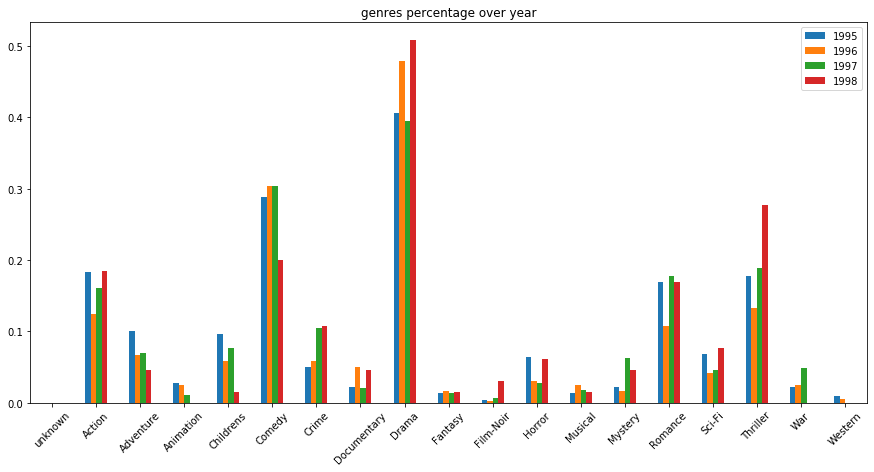

In [93]:
Year = {}
Year[1995] = movie_1995[genre_cls].sum()/len(movie_1995)
Year[1996] = movie_1996[genre_cls].sum()/len(movie_1996)
Year[1997] = movie_1997[genre_cls].sum()/len(movie_1997)
Year[1998] = movie_1998[genre_cls].sum()/len(movie_1998)
movie_year = pd.DataFrame(Year) 
axes = movie_year.plot.bar(rot=45,figsize=(15,7))
axes.set_title('genres percentage over year')

In [6]:
############################### Genre of the movies ############################### 
genre_data= pd.read_csv('ml-100k/u.genre',sep='|',names=["movie_type", "type_id"])
genre_data

movie_type  type_id
0       unknown        0
1        Action        1
2     Adventure        2
3     Animation        3
4    Children's        4
5        Comedy        5
6         Crime        6
7   Documentary        7
8         Drama        8
9       Fantasy        9
10    Film-Noir       10
11       Horror       11
12      Musical       12
13      Mystery       13
14      Romance       14
15       Sci-Fi       15
16     Thriller       16
17          War       17
18      Western       18

## 2.2 user data

In [76]:
############################### Demographic information about the users ###############################
column_names = ["user_id", "age", "gender", "occupation", "zip_code"]
user_data = pd.read_csv('ml-100k/u.user',sep='|', names=column_names)
user_data

user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]

In [8]:
############################### A list of the occupations(the jobs types of users). ############################### 
occupation_data = pd.read_csv('ml-100k/u.occupation',sep='|',names=["occupation"])
occupation_data = occupation_data.reset_index().rename(columns={'index':'occupation_id'})

occupation_data

occupation_id     occupation
0               0  administrator
1               1         artist
2               2         doctor
3               3       educator
4               4       engineer
5               5  entertainment
6               6      executive
7               7     healthcare
8               8      homemaker
9               9         lawyer
10             10      librarian
11             11      marketing
12             12           none
13             13          other
14             14     programmer
15             15        retired
16             16       salesman
17             17      scientist
18             18        student
19             19     technician
20             20         writer

### 2.2.1 statistical info

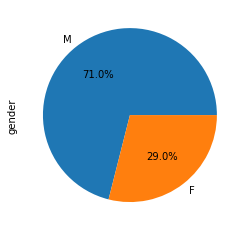

In [36]:
user_data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

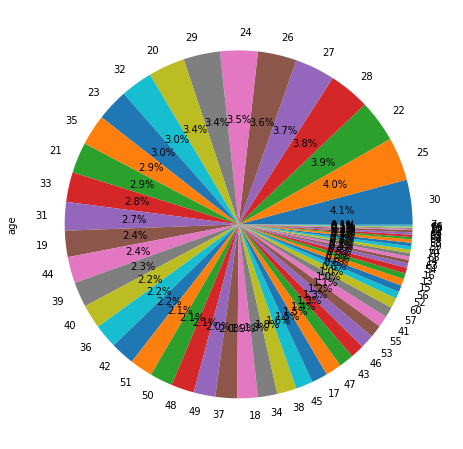

In [38]:
user_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(8,8))

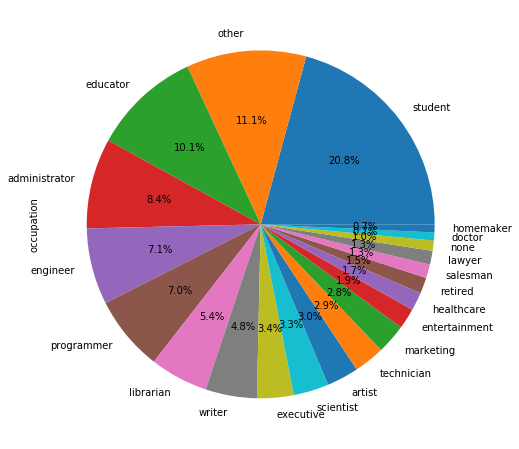

In [37]:
user_data['occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(8,8))

### 2.2.2 location

In [8]:
Map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=15)
Map

## 2.3 interaction info?

In [9]:
############################### Create user_item_matrix ############################### 
data= pd.read_csv('ml-100k/u.data',sep='\t', names=["user_id", "item_id", "rating", "timestamp"])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['count'] = 1
data

user_id  item_id  rating           timestamp  count
0          196      242       3 1997-12-04 15:55:49      1
1          186      302       3 1998-04-04 19:22:22      1
2           22      377       1 1997-11-07 07:18:36      1
3          244       51       2 1997-11-27 05:02:03      1
4          166      346       1 1998-02-02 05:33:16      1
...        ...      ...     ...                 ...    ...
99995      880      476       3 1997-11-22 05:10:44      1
99996      716      204       5 1997-11-17 19:39:03      1
99997      276     1090       1 1997-09-20 22:49:55      1
99998       13      225       2 1997-12-17 22:52:36      1
99999       12      203       3 1997-11-19 17:13:03      1

[100000 rows x 5 columns]

In [10]:
data_merged = pd.merge(data,user_data,on='user_id',how='left')
data_merged = pd.merge(data_merged,movies_data,on='item_id',how='left')
data_merged

user_id  item_id  rating           timestamp  count  age gender  \
0          196      242       3 1997-12-04 15:55:49      1   49      M   
1          186      302       3 1998-04-04 19:22:22      1   39      F   
2           22      377       1 1997-11-07 07:18:36      1   25      M   
3          244       51       2 1997-11-27 05:02:03      1   28      M   
4          166      346       1 1998-02-02 05:33:16      1   47      M   
...        ...      ...     ...                 ...    ...  ...    ...   
99995      880      476       3 1997-11-22 05:10:44      1   13      M   
99996      716      204       5 1997-11-17 19:39:03      1   36      F   
99997      276     1090       1 1997-09-20 22:49:55      1   21      M   
99998       13      225       2 1997-12-17 22:52:36      1   47      M   
99999       12      203       3 1997-11-19 17:13:03      1   28      F   

          occupation zip_code                   movie_title  ... Fantasy  \
0             writer    55105                  Kolya (1996)  ...       0   
1          executive    00000      L.A. Confidential (1997)  ...       0   
2             writer    40206           Heavyweights (1994)  ...       0   
3         technician    80525    Legends of the Fall (1994)  ...       0   
4           educator    55113           Jackie Brown (1997)  ...       0   
...              ...      ...                           ...  ...     ...   
99995        student    83702  First Wives Club, The (1996)  ...       0   
99996  administrator    44265     Back to the Future (1985)  ...       0   
99997        student    95064                 Sliver (1993)  ...       0   
99998       educator    29206         101 Dalmatians (1996)  ...       0   
99999          other    06405             Unforgiven (1992)  ...       0   

       Film-Noir Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0              0      0        0        0        0       0         0    0   
1              1      0        0        1        0       0         1    0   
2              0      0        0        0        0       0         0    0   
3              0      0        0        0        1       0         0    1   
4              0      0        0        0        0       0         0    0   
...          ...    ...      ...      ...      ...     ...       ...  ...   
99995          0      0        0        0        0       0         0    0   
99996          0      0        0        0        0       1         0    0   
99997          0      0        0        0        0       0         1    0   
99998          0      0        0        0        0       0         0    0   
99999          0      0        0        0        0       0         0    0   

       Western  
0            0  
1            0  
2            0  
3            1  
4            0  
...        ...  
99995        0  
99996        0  
99997        0  
99998        0  
99999        1  

[100000 rows x 32 columns]

In [11]:
## top5 famours movies per year
data_1997 = data_merged[data_merged['timestamp'].dt.year == 1997]
data_1998 = data_merged[data_merged['timestamp'].dt.year == 1998]

In [12]:
data_1997[['movie_title','count']].groupby('movie_title').sum().nlargest(5, columns=['count'])

count
movie_title                     
Star Wars (1977)             335
Fargo (1996)                 301
Return of the Jedi (1983)    300
Toy Story (1995)             267
Liar Liar (1997)             261

In [13]:
data_1998[['movie_title','count']].groupby('movie_title').sum().nlargest(5, columns=['count'])

count
movie_title                
Titanic (1997)          322
Contact (1997)          264
Star Wars (1977)        248
Air Force One (1997)    241
Scream (1996)           238

In [14]:
data_merged[['movie_title','count']].groupby('movie_title').sum().nlargest(5, columns=['count'])

count
movie_title                     
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485

Text(0.5, 1.0, 'genres percentage over year')

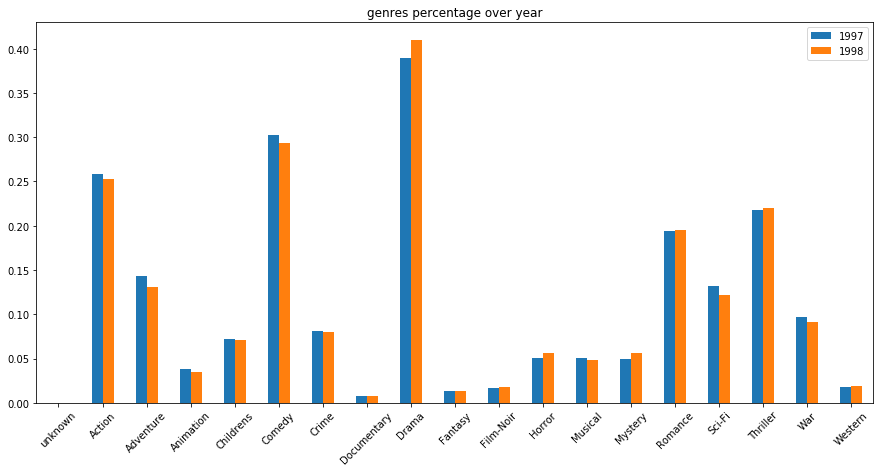

In [17]:
## the most famours movie genre every year
Popular = {}
Popular[1997] = data_1997[genre_cls].sum()/len(data_1997)
Popular[1998] = data_1998[genre_cls].sum()/len(data_1998)
Popular_year = pd.DataFrame(Popular) 
axes = Popular_year.plot.bar(rot=45,figsize=(15,7))
axes.set_title('genres percentage over year')

# 3. Graph analysis

## 3.1 user graph

In [136]:
def similarity(row,data):
    sim = pd.DataFrame(np.cos(row['age_normal']-data['age_normal']))
    sim['gender'] = (row['gender']==data['gender'])
    sim['occupation'] = (row['occupation']==data['occupation'])
    sim['zip_code'] = (row['zip_code'] == data['zip_code'])
    return sim

In [137]:
def plt_graph(adjacency,data,title):
    graph_user = nx.from_numpy_matrix(adjacency)
    print('The number of connected components is {}'.format(nx.number_connected_components(graph_user)))
    coords = nx.spring_layout(graph_user,k=0.03)  # Force-directed layout.
    fig=plt.figure(figsize=(15, 10))
    labels = data.iloc[np.sort(nx.nodes(graph_user))]
    im=nx.draw_networkx_nodes(graph_user, coords, node_size=40,node_color=labels, cmap='tab20b',vmin=min(data), vmax=max(data))
    nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
    plt.title(title)
    plt.colorbar(im)
    return graph_user

In [138]:
# Initialize the adjacency matrix
n_users = 943
adjacency_user = np.zeros((n_users, n_users), dtype=float)
user_features1 =user_data.copy()
user_features1['age_normal'] = user_features1['age']/max(user_features1['age'])
user_features1= pd.merge(user_features1,occupation_data,on='occupation',how='left')
user_features1['gender_id'] = user_features1['gender'].replace(['M','F'],[1,0])

In [172]:
user_features2=user_features1[['user_id','age','gender','occupation_id']].copy()
user_features2['avg_rating'] = data_merged[['user_id','item_id','rating']].groupby('user_id').mean()['rating'].values
user_features2['movie'] = data_merged[['user_id','item_id','rating']].groupby('user_id')['item_id'].apply(set).values

In [173]:
user_features1

user_id  age gender     occupation zip_code  age_normal  occupation_id  \
0          1   24      M     technician    85711    0.328767             19   
1          2   53      F          other    94043    0.726027             13   
2          3   23      M         writer    32067    0.315068             20   
3          4   24      M     technician    43537    0.328767             19   
4          5   33      F          other    15213    0.452055             13   
..       ...  ...    ...            ...      ...         ...            ...   
938      939   26      F        student    33319    0.356164             18   
939      940   32      M  administrator    02215    0.438356              0   
940      941   20      M        student    97229    0.273973             18   
941      942   48      F      librarian    78209    0.657534             10   
942      943   22      M        student    77841    0.301370             18   

     gender_id  
0            1  
1            0  
2            1  
3            1  
4            0  
..         ...  
938          0  
939          1  
940          1  
941          0  
942          1  

[943 rows x 8 columns]

In [174]:
user_features2

user_id  age gender  occupation_id  avg_rating  \
0          1   24      M             19    3.610294   
1          2   53      F             13    3.709677   
2          3   23      M             20    2.796296   
3          4   24      M             19    4.333333   
4          5   33      F             13    2.874286   
..       ...  ...    ...            ...         ...   
938      939   26      F             18    4.265306   
939      940   32      M              0    3.457944   
940      941   20      M             18    4.045455   
941      942   48      F             10    4.265823   
942      943   22      M             18    3.410714   

                                                 movie  
0    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1    {257, 258, 1, 10, 13, 14, 269, 272, 273, 274, ...  
2    {258, 260, 264, 268, 271, 272, 288, 294, 299, ...  
3    {258, 260, 264, 11, 271, 288, 294, 300, 301, 3...  
4    {1, 2, 17, 21, 24, 25, 29, 40, 42, 50, 62, 63,...  
..                                                 ...  
938  {257, 258, 255, 1028, 9, 266, 15, 274, 275, 40...  
939  {4, 516, 7, 8, 9, 521, 12, 14, 527, 529, 549, ...  
940  {257, 258, 1, 7, 15, 273, 147, 919, 408, 294, ...  
941  {514, 131, 1028, 261, 258, 135, 520, 265, 259,...  
942  {2, 1028, 9, 11, 12, 526, 1044, 22, 23, 24, 10...  

[943 rows x 6 columns]

In [142]:
for i in range(n_users):
    adjacency_user[i,:] = similarity(user_features1.loc[i,:],user_features1).mean(axis=1)

Text(0.5, 1.05, 'Adjacency matrix')

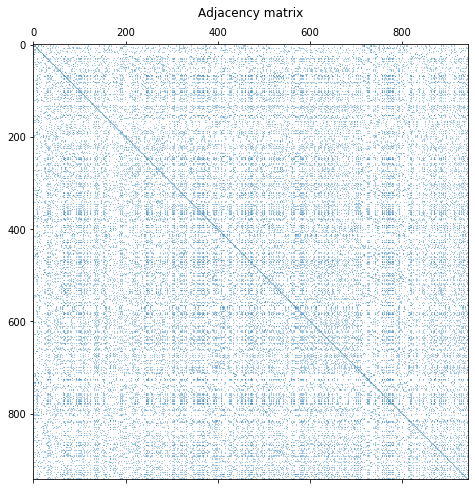

In [143]:
mask = adjacency_user<=0.5
adjacency = adjacency_user.copy()
adjacency[mask]=0

plt.figure(figsize=(8,8))
plt.spy(adjacency,markersize=0.1)
plt.title('Adjacency matrix')

The number of connected components is 12


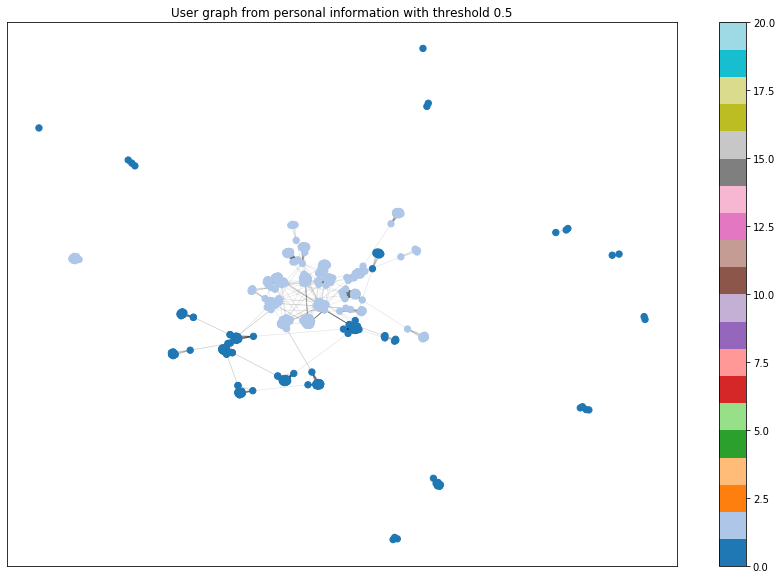

In [85]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['gender_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

The number of connected components is 12


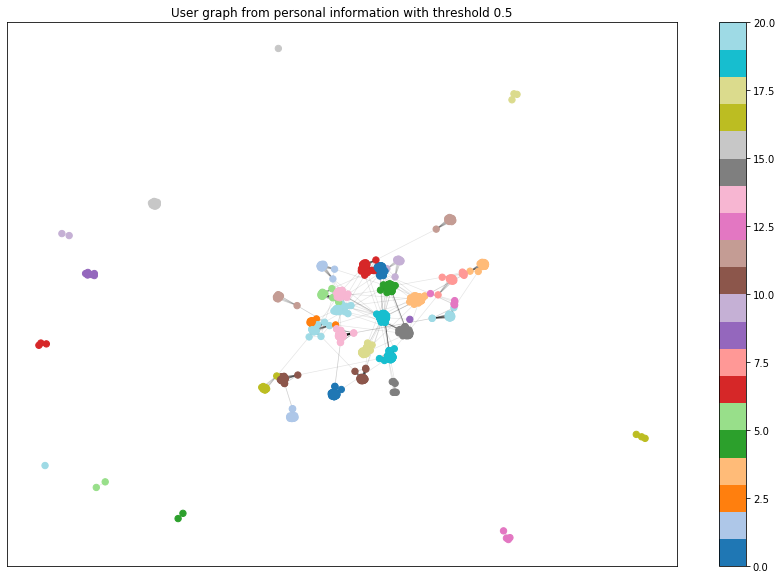

In [87]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

The number of connected components is 12


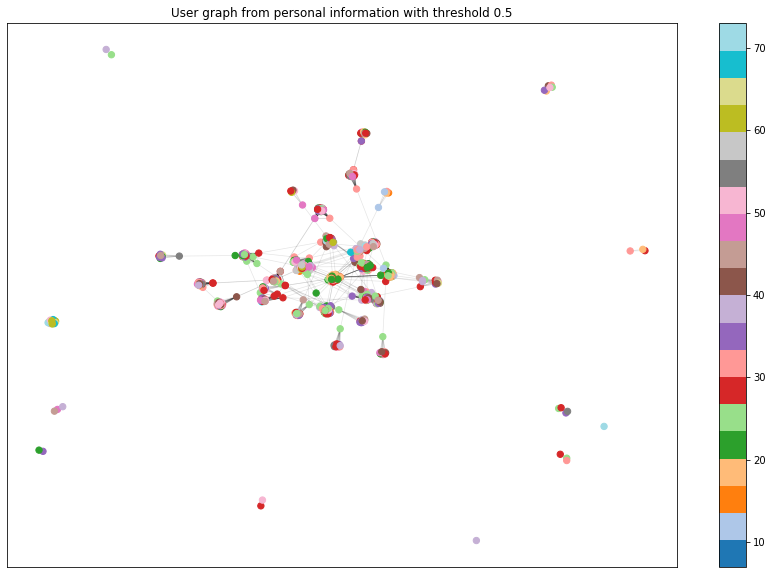

In [89]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['age'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

The number of nodes is is 903


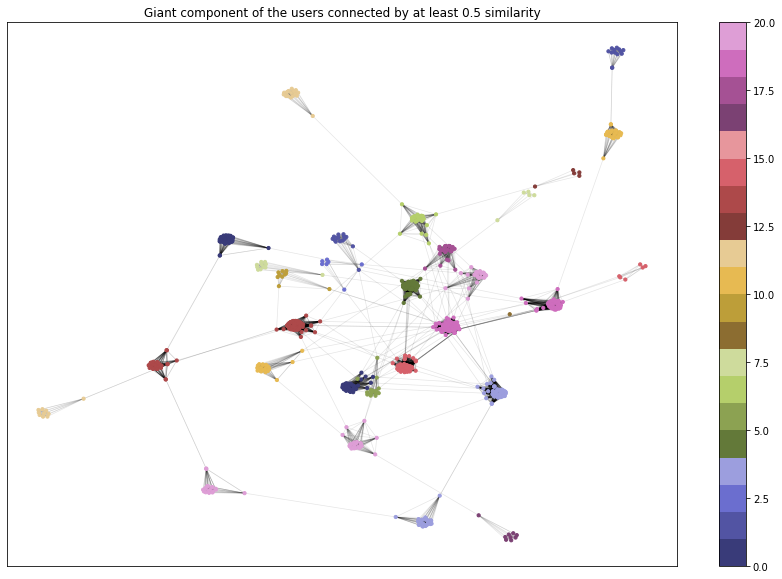

In [504]:
G = graph_user1
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.

print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels, cmap='tab20b',vmin=0, vmax=20)
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);

In [176]:
def common_movie(i,j,data):
    left = data[data['user_id']==i+1]['movie'].values.tolist()[0]
    right = data[data['user_id']==j+1]['movie'].values.tolist()[0]
    common = left.intersection(right)
    return len(common)

In [177]:
adjacency_user2 = np.zeros((n_users, n_users), dtype=float)
for i in range(n_users):
    print(i)
    for j in range(n_users):
        if j<i:
            adjacency_user2[i,j] = adjacency_user2[j,i]
        else:
            adjacency_user2[i,j] = common_movie(i,j,user_features2)
np.save('adjacency_user2.npy', adjacency_user2)

0
1
2
3
4
5
6
7
8
9


SystemError: <built-in function is_scalar> returned a result with an error set

Text(0.5, 1.0, 'histogram of number of common movies')

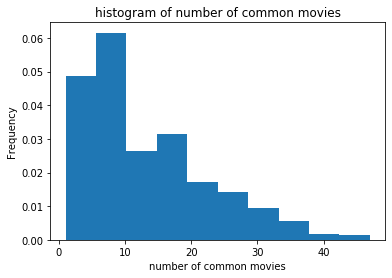

In [216]:
adjacency_user2 = np.load('adjacency_user2.npy')
median = []
for i in range(n_users):
    median.append(np.median(adjacency_user2[i,:]))

plt.hist(median, density=True)
plt.xlabel('number of common movies')
plt.ylabel('Frequency')
plt.title('histogram of number of common movies')

Text(0.5, 1.05, 'Adjacency matrix')

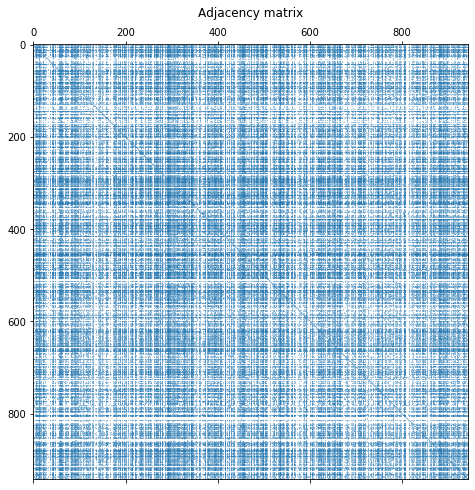

In [93]:
mask2 = adjacency_user2<20
adjacency = adjacency_user2.copy()
adjacency[mask2]=0
# Normalize 
adjacency_normalized = np.divide(adjacency,adjacency.max());
plt.figure(figsize=(8,8))
plt.spy(adjacency_normalized,markersize=0.1)
plt.title('Adjacency matrix')

The number of connected components is 36


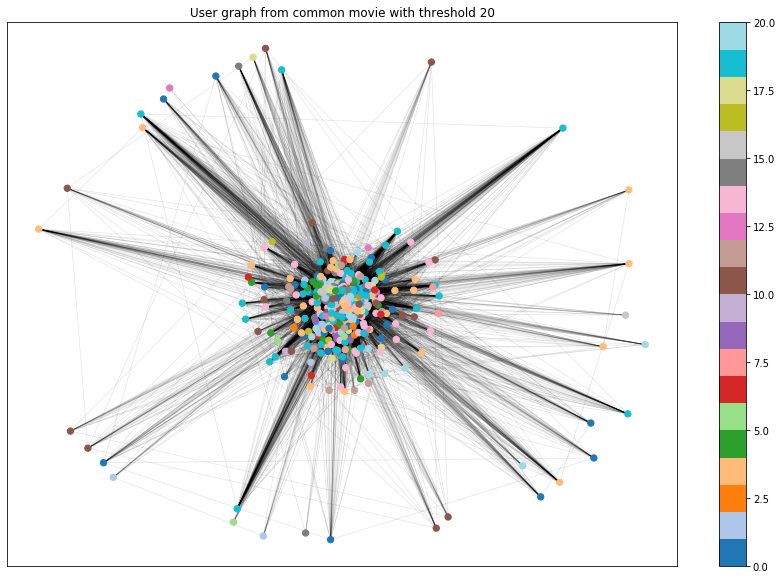

In [94]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

The number of connected components is 36


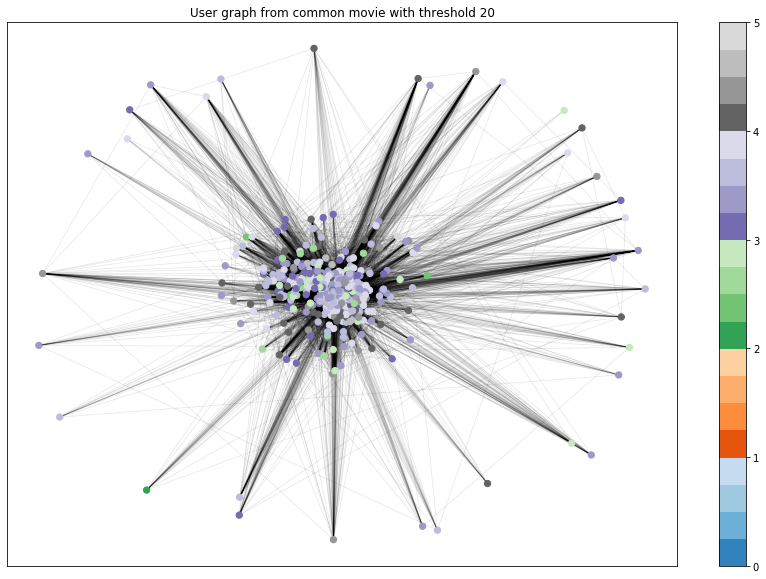

In [113]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['avg_rating'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20c',vmin=0, vmax=5)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

The number of connected components is 36


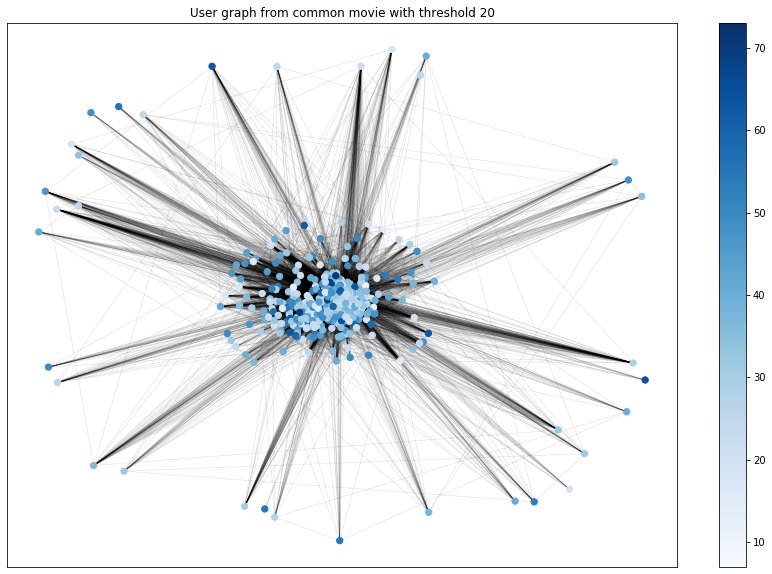

In [114]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['age'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='Blues',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

The number of nodes is is 908


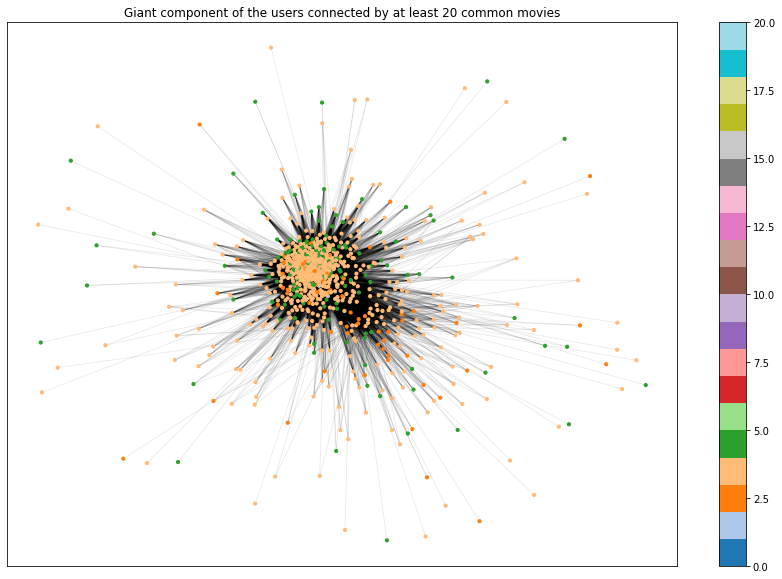

In [217]:
G = graph_user2
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.
print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = user_features2['avg_rating'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 20 common movies')
plt.colorbar(im);

## 3.2 movie graph

In [191]:
movie_features1 = movies_data[['item_id']+genre_cls]
movie_features1['year'] = movies_data['release_date'].dt.year
movie_features1

/home/leishengzhao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


item_id  unknown  Action  Adventure  Animation  Childrens  Comedy  \
0           1        0       0          0          1          1       1   
1           2        0       1          1          0          0       0   
2           3        0       0          0          0          0       0   
3           4        0       1          0          0          0       1   
4           5        0       0          0          0          0       0   
...       ...      ...     ...        ...        ...        ...     ...   
1677     1678        0       0          0          0          0       0   
1678     1679        0       0          0          0          0       0   
1679     1680        0       0          0          0          0       0   
1680     1681        0       0          0          0          0       1   
1681     1682        0       0          0          0          0       0   

      Crime  Documentary  Drama  ...  Film-Noir  Horror  Musical  Mystery  \
0         0            0      0  ...          0       0        0        0   
1         0            0      0  ...          0       0        0        0   
2         0            0      0  ...          0       0        0        0   
3         0            0      1  ...          0       0        0        0   
4         1            0      1  ...          0       0        0        0   
...     ...          ...    ...  ...        ...     ...      ...      ...   
1677      0            0      1  ...          0       0        0        0   
1678      0            0      0  ...          0       0        0        0   
1679      0            0      1  ...          0       0        0        0   
1680      0            0      0  ...          0       0        0        0   
1681      0            0      1  ...          0       0        0        0   

      Romance  Sci-Fi  Thriller  War  Western    year  
0           0       0         0    0        0  1995.0  
1           0       0         1    0        0  1995.0  
2           0       0         1    0        0  1995.0  
3           0       0         0    0        0  1995.0  
4           0       0         1    0        0  1995.0  
...       ...     ...       ...  ...      ...     ...  
1677        0       0         0    0        0  1998.0  
1678        1       0         1    0        0  1998.0  
1679        1       0         0    0        0  1998.0  
1680        0       0         0    0        0  1994.0  
1681        0       0         0    0        0  1996.0  

[1682 rows x 21 columns]

In [192]:
movie_features1['year']

0       1995.0
1       1995.0
2       1995.0
3       1995.0
4       1995.0
         ...  
1677    1998.0
1678    1998.0
1679    1998.0
1680    1994.0
1681    1996.0
Name: year, Length: 1682, dtype: float64

In [115]:
# Initialize the adjacency matrix
n_movies = 1682
adjacency_movie = np.zeros((n_movies, n_movies), dtype=float)

In [448]:
for i in range(n_movies):
    adjacency_movie[i,:] = (movie_features1.loc[i,:] & movie_features1).sum(axis=1)

Text(0.5, 1.05, 'Adjacency matrix')

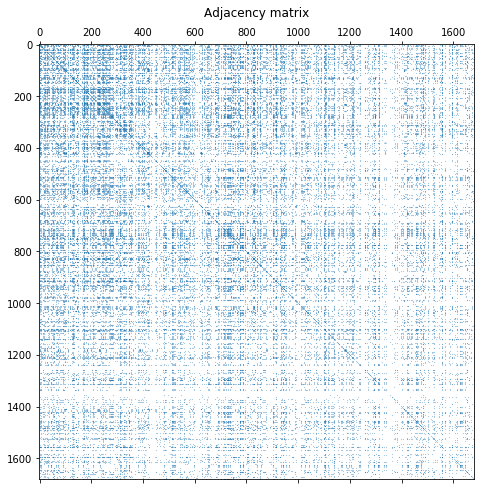

In [496]:
# Normalize 
mask_movie = adjacency_movie<2
adjacency = adjacency_movie.copy()
adjacency[mask_movie] = 0 
adjacency_movie_nor =np.divide(adjacency,adjacency.max())
plt.figure(figsize=(8,8))
plt.spy(adjacency_movie_nor,markersize=0.1)
plt.title('Adjacency matrix')

The number of connected components is 838


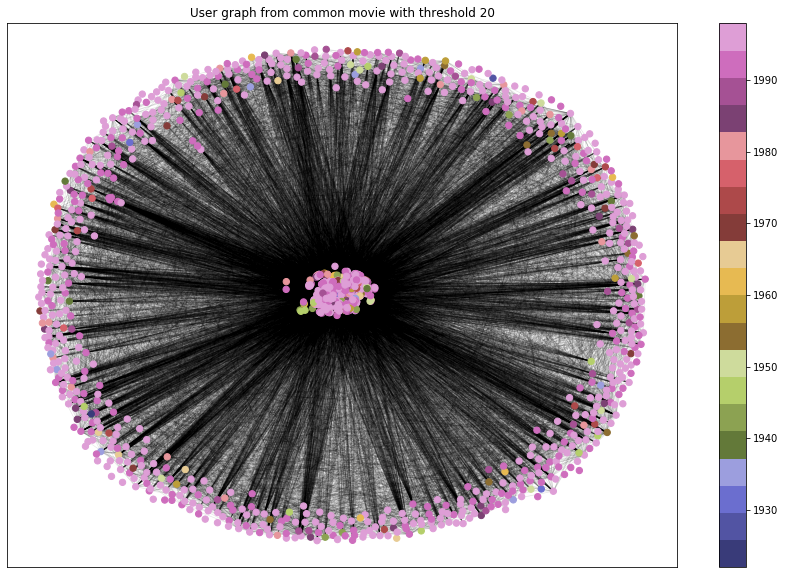

In [517]:
graph_movie1 = nx.from_numpy_matrix(adjacency_movie_nor)
G = graph_movie1
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = movie_features1['year'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20b',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

The number of nodes is is 839


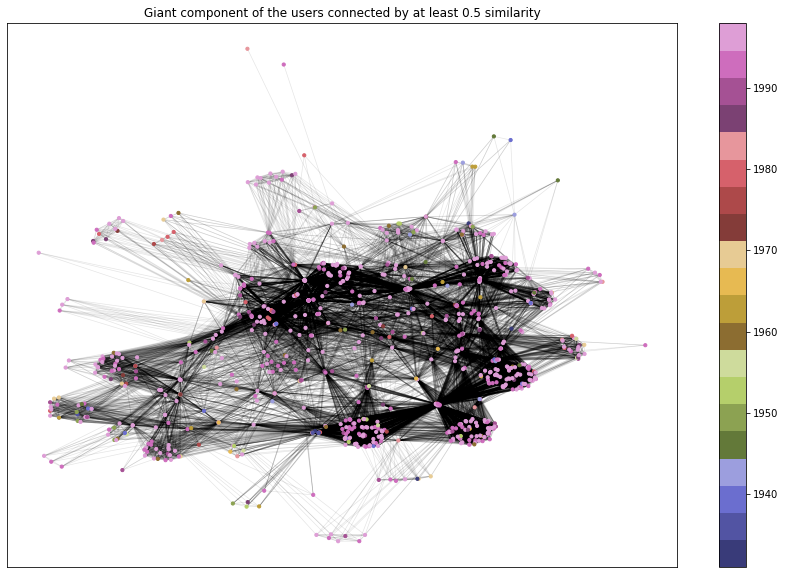

In [518]:
G = graph_movie1
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.

print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = movie_features1['year'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels,cmap='tab20b',vmin=min(labels),vmax=max(labels))
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);

In [193]:
movie_features2 = movie_features1[['item_id','year']].copy()
movie_features2['avg_rating'] = data_merged[['user_id','item_id','rating']].groupby('item_id').mean()['rating'].values
movie_features2['user'] = data_merged[['user_id','item_id','rating']].groupby('item_id')['user_id'].apply(set).values

In [206]:
movie_features2

item_id    year  avg_rating  \
0           1  1995.0    3.878319   
1           2  1995.0    3.206107   
2           3  1995.0    3.033333   
3           4  1995.0    3.550239   
4           5  1995.0    3.302326   
...       ...     ...         ...   
1677     1678  1998.0    1.000000   
1678     1679  1998.0    3.000000   
1679     1680  1998.0    2.000000   
1680     1681  1994.0    3.000000   
1681     1682  1996.0    3.000000   

                                                   user  
0     {1, 2, 5, 6, 10, 13, 15, 16, 17, 18, 20, 21, 2...  
1     {1, 5, 521, 13, 532, 22, 536, 30, 543, 551, 42...  
2     {1, 523, 534, 537, 548, 551, 43, 49, 561, 569,...  
3     {1, 514, 7, 10, 12, 13, 524, 527, 16, 18, 19, ...  
4     {1, 13, 21, 28, 546, 551, 43, 44, 562, 577, 72...  
...                                                 ...  
1677                                              {863}  
1678                                              {863}  
1679                                              {863}  
1680                                              {896}  
1681                                              {916}  

[1682 rows x 4 columns]

In [195]:
def common_user(i,j,data):
    left = data[data['item_id']==i+1]['user'].values.tolist()[0]
    right = data[data['item_id']==j+1]['user'].values.tolist()[0]
    common = left.intersection(right)
    return len(common)

In [197]:
adjacency_movie2 = np.zeros((n_movies, n_movies), dtype=float)
for i in range(n_movies):
    print(i)
    for j in range(n_movies):
        if j<i:
            adjacency_movie2[i,j] = adjacency_movie2[j,i]
        else:
            adjacency_movie2[i,j] = common_user(i,j,movie_features2)
np.save('adjacency_movie2.npy', adjacency_movie2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, 'histogram of number of common user')

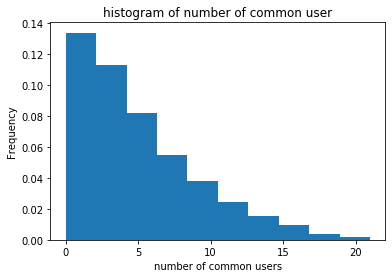

In [204]:
adjacency_movie2 = np.load('adjacency_movie2.npy')
median = []
for i in range(n_users):
    median.append(np.median(adjacency_movie2[i,:]))

plt.hist(median, density=True)
plt.xlabel('number of common users')
plt.ylabel('Frequency')
plt.title('histogram of number of common user')

Text(0.5, 1.05, 'Adjacency matrix')

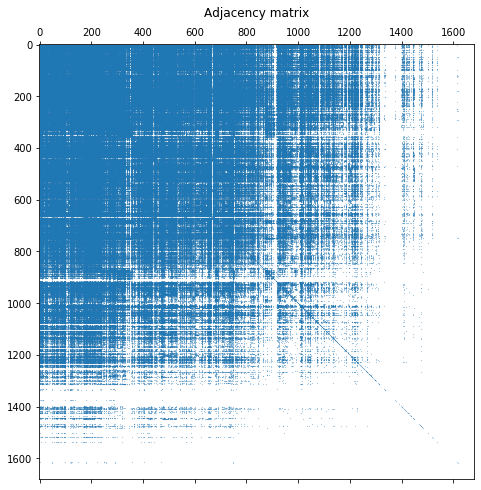

In [214]:
mask2 = adjacency_movie2<8
adjacency = adjacency_movie2.copy()
adjacency[mask2]=0
# Normalize 
adjacency_normalized = np.divide(adjacency,adjacency.max());
plt.figure(figsize=(8,8))
plt.spy(adjacency_normalized,markersize=0.1)
plt.title('Adjacency matrix')

The number of connected components is 475


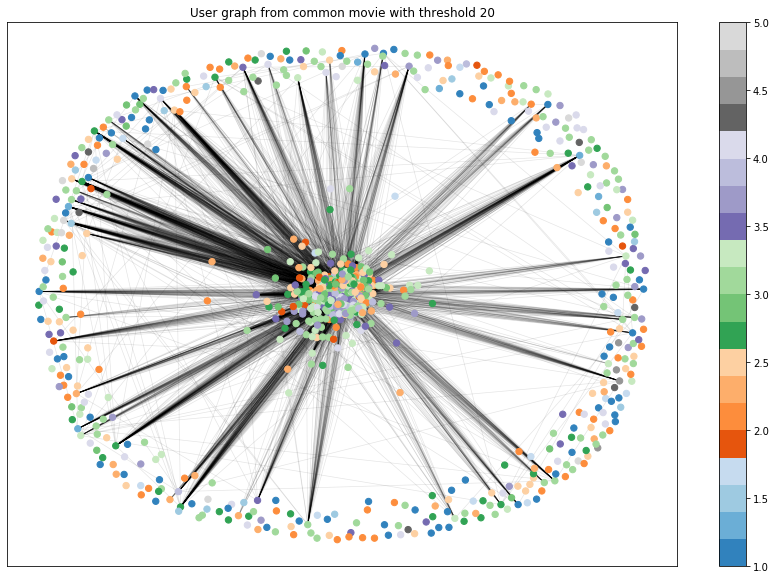

In [215]:
graph_movie2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_movie2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = movie_features2['avg_rating'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20c',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

The number of nodes is is 1208


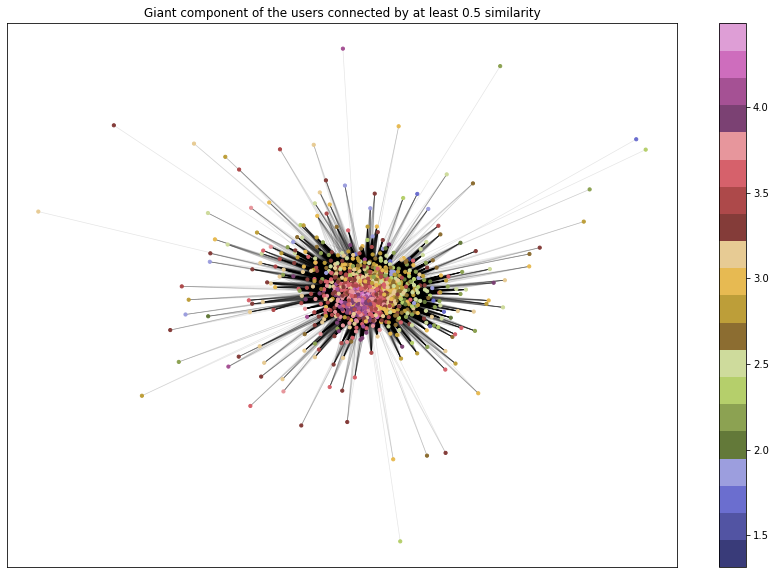

In [218]:
G = graph_movie2
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.

print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = movie_features2['avg_rating'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels,cmap='tab20b',vmin=min(labels),vmax=max(labels))
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);